<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **SQL para Análise de Dados**
## **Módulo 8** | SQL: Projeto Final

Professora [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)<br>
Aluno [Samuel Saturno](linkedin.com/in/samuel-saturno-33b42872)<br>


---

# **0. Conjunto de dados**

O conjunto de dados utilizado neste projeto é uma subamostra do dataset original disponibilizado pelo professor André Perez. Essa amostragem foi realizada para otimizar o processamento dos dados para as atividades deste projeto.

É importante estar ciente de que, por se tratar de uma subamostra, as proporções das categorias podem não ser exatamente as mesmas encontradas no conjunto de dados completo. Consequentemente, as análises e estimativas baseadas nesta amostra podem apresentar uma precisão menor em comparação com uma análise conduzida no dataset original.

Os resultados aqui apresentados têm fins didáticos, no contexto do curso, e para demonstração pessoal em portfólio. As consultas (queries) desenvolvidas podem ser aplicadas integralmente ao dataset original para obter conclusões mais robustas e relevantes em análises futuras.

Os dados fornecem informações sobre clientes de um banco e incluem as seguintes variáveis:

| Coluna                   | Descrição                                               | Tipo     |
| :----------------------- | :-----------------------------------------------------: | -------: |
| **idade**                | idade do cliente                                        | *int*    |
| **sexo**                 | sexo do cliente (F ou M)                                | *string* |
| **dependentes**          | número de dependentes do cliente                        | *int*    |
| **escolaridade**         | nível de escolaridade do clientes                       | *string* |
| **estado_civil**         | estado civil do cliente                                 | *string* |
| **salario_anual**        | faixa salarial do cliente                               | *string* |
| **tipo_cartao**          | tipo de cartao do cliente                               | *string* |
| **qtd_produtos**         | quantidade de produtos comprados nos últimos 12 meses   | *bigint* |
| **iteracoes_12m**        | quantidade de iterações/transacoes nos ultimos 12 meses | *int*    |
| **meses_inativo_12m**    | quantidade de meses que o cliente ficou inativo         | *int*    |
| **limite_credito**       | limite de credito do cliente                            | *float*  |
| **valor_transacoes_12m** | valor das transações dos ultimos 12 meses               | *float*  |
| **qtd_transacoes_12m**   | quantidade de transacoes dos ultimos 12 meses           | *int*    |

In [1]:
# Import da biblioteca pandas para visualização dos arquivos CSV resultantes das queries

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import io

# **1. Criando os Buckets**

1.   Bucket-ebac-credito-samuel
- Utilizado para armazenar o dataset principal que será analisado.
2.   Bucket-ebac-creditoresults:
- Responsável por receber os resultados das queries executadas no Amazon Athena.



# **2. Criando a tabela "credito" no ambiente do AWS Athena**


```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
	`idade` int,
	`sexo` string,
	`dependentes` int,
	`escolaridade` string,
	`estado_civil` string,
	`salario_anual` string,
	`tipo_cartao` string,
	`qtd_produtos` bigint,
	`iteracoes_12m` int,
	`meses_inativo_12m` int,
	`limite_credito` float,
	`valor_transacoes_12m` float,
	`qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
	'serialization.format' = ',',
	'field.delim' = ','
)
LOCATION 's3://backet-ebac-credito-samuel/'
TBLPROPERTIES ('has_encrypted_data' = 'false');
```

# **2. EDA (Exploratory Data Analysis)**

## 2.1 Preview da tabela

> **Query 1:**

```sql
SELECT * FROM "default"."credito" limit 10;
```

In [4]:
url = 'https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query01.csv'
df = pd.read_csv(url)

# Exibe as primeiras linhas do DataFrame
df.head()


,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28


## 2.2 Quantidade de linhas no dataset

> **Query 2:**

```sql
SELECT COUNT(*) AS quantidade_linhas
FROM credito;
```

In [5]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query02.csv')

,quantidade_linhas
0,2564


## 2.3 Tipos de dados em cada coluna

> **Query 3:**

```sql
DESCRIBE credito;
```



In [8]:
url = 'https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/main/Datasets/Query03.png'
display(Image(url=url))



> Os tipos dos dados no *dataset* podem ser descritos como:
> - `int` representa dados do tipo inteiro (numérico);
> - `string` representa dados do tipo texto ou cadeia de caracteres;
> - `bigint` representa dados do tipo inteiro longo (um número inteiro maior do que o tipo int);
> - `float` representa dados do tipo número de ponto flutuante (um número com parte fracionária).

## 2.4.1 Categorias da variável `escolaridade`

> **Query 4:**

```sql
SELECT DISTINCT escolaridade
FROM credito;
```

In [30]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query04.csv')

,escolaridade
0,ensino medio
1,na
2,mestrado
3,graduacao
4,doutorado
5,sem educacao formal


> Podemos notar que há valores **nulos/ausentes** na variável categórica `escolaridade`, representados pelo valor **`na`**.

## 2.4.2 Categorias da variável `estado_civil`

> **Query 5:**

```sql
SELECT DISTINCT estado_civil
FROM credito;
```

In [10]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query05.csv')

,estado_civil
0,casado
1,divorciado
2,na
3,solteiro


## 2.4.3 Categorias da variável `sexo`

> **Query 6:**

```sql
SELECT DISTINCT sexo
FROM credito;
```

In [11]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query06.csv')

,sexo
0,M
1,F


## 2.5.1 Quantidade de clientes em cada faixa salarial

> **Query 7:**

```sql
SELECT salario_anual,
	COUNT(*) AS quantidade
FROM credito
GROUP BY salario_anual
ORDER BY CASE
		salario_anual
		WHEN 'menos que $40K' THEN 1
		WHEN '$40K - $60K' THEN 2
		WHEN '$60K - $80K' THEN 3
		WHEN '$80K - $120K' THEN 4
		WHEN '$120K +' THEN 5 ELSE 6
	END;
```

In [20]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query07.csv')

,salario_anual,quantidade
0,menos que $40K,701
1,$40K - $60K,467
2,$60K - $80K,451
3,$80K - $120K,488
4,$120K +,222
5,na,235


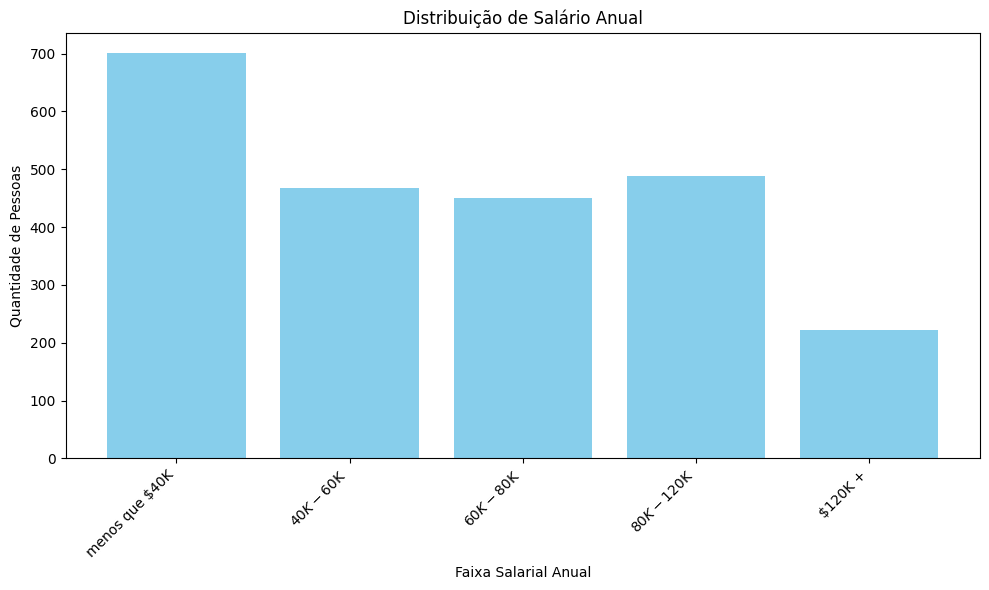

In [19]:
# Carregar os dados do CSV
url = 'https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query07.csv'
df = pd.read_csv(url)

# Remover a linha com valor 'na' para evitar problemas no gráfico
df_sem_na = df[df['salario_anual'] != 'na']

# Ordenar as faixas salariais para o gráfico ficar mais intuitivo
faixas_ordenadas = ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
df_ordenado = df_sem_na.set_index('salario_anual').loc[faixas_ordenadas].reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_ordenado['salario_anual'], df_ordenado['quantidade'], color='skyblue')
plt.xlabel('Faixa Salarial Anual')
plt.ylabel('Quantidade de Pessoas')
plt.title('Distribuição de Salário Anual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2.5.2 Quantidade de clientes de acordo com cada tipo de cartão

> **Query 8:**

```sql
SELECT tipo_cartao,
	COUNT(*) AS quantidade
FROM credito
GROUP BY tipo_cartao
ORDER BY quantidade DESC;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query08.csv')

,tipo_cartao,quantidade
0,blue,2453
1,silver,93
2,gold,16
3,platinum,2


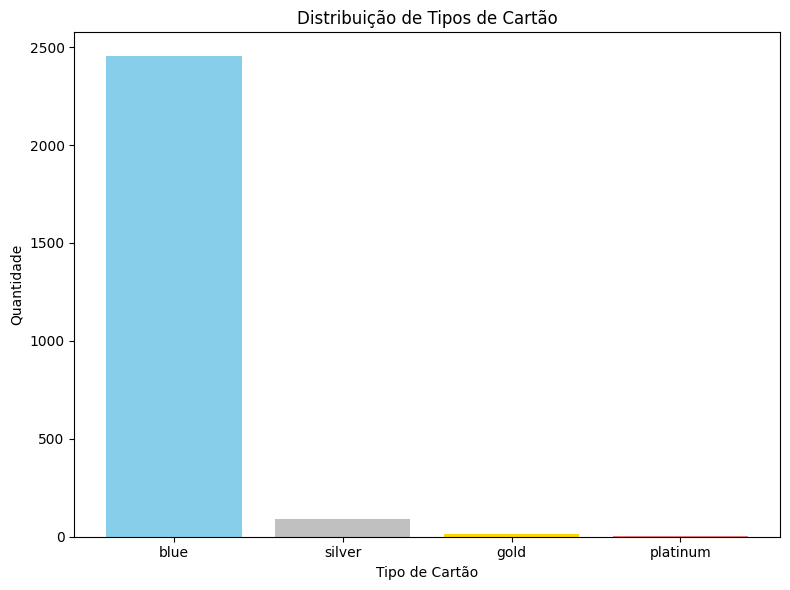

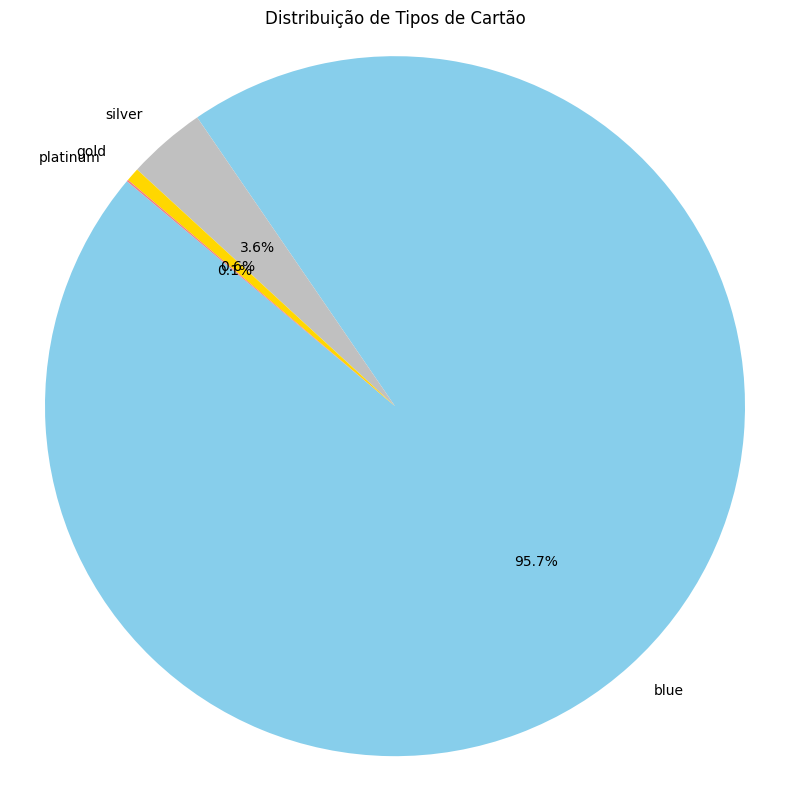

In [21]:
# Dados no formato CSV
data = """tipo_cartao,quantidade
blue,2453
silver,93
gold,16
platinum,2
"""

# Ler os dados diretamente da string CSV
df = pd.read_csv(io.StringIO(data))

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df['tipo_cartao'], df['quantidade'], color=['skyblue', 'silver', 'gold', 'lightcoral'])
plt.xlabel('Tipo de Cartão')
plt.ylabel('Quantidade')
plt.title('Distribuição de Tipos de Cartão')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Opcional: Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df['quantidade'], labels=df['tipo_cartao'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'silver', 'gold', 'lightcoral'])
plt.title('Distribuição de Tipos de Cartão')
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo
plt.tight_layout()
plt.show()

## 2.5.3 Quantidade de clientes de acordo com o sexo

> **Query 9:**

```sql
SELECT sexo,
	COUNT(*) AS quantidade
FROM credito
GROUP BY sexo
ORDER BY quantidade DESC;
```

In [22]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query09.csv')

,sexo,quantidade
0,M,1563
1,F,1001


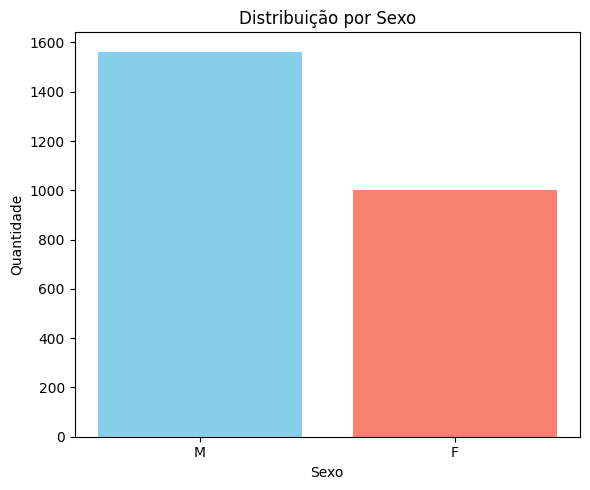

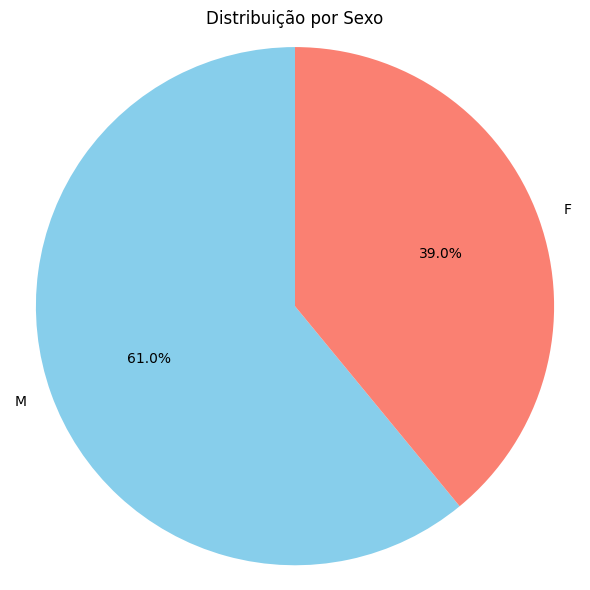

In [23]:
# Dados no formato CSV
data = """sexo,quantidade
M,1563
F,1001
"""

# Ler os dados diretamente da string CSV
df = pd.read_csv(io.StringIO(data))

# Criar o gráfico de barras
plt.figure(figsize=(6, 5))
plt.bar(df['sexo'], df['quantidade'], color=['skyblue', 'salmon'])
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Distribuição por Sexo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Opcional: Criar um gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(df['quantidade'], labels=df['sexo'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribuição por Sexo')
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo
plt.tight_layout()
plt.show()

## 2.6.1 Análise da idade dos clientes (média, mínima e máxima)

> **Query 10:**

```sql
SELECT ROUND(AVG(idade)) AS idade_media,
	MIN(idade) AS idade_minima,
	MAX(idade) AS idade_maxima
FROM credito;
```

In [24]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query10.csv')

,idade_media,idade_minima,idade_maxima
0,46.0,26,73


## 2.6.2 Análise dos gastos dos clientes (média, mínima e máxima)

> **Query 11:**

```sql
SELECT ROUND(AVG(valor_transacoes_12m), 2) AS valor_medio_transacoes,
	MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
	MAX(valor_transacoes_12m) AS valor_maximo_transacoes
FROM credito;
```

In [25]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query11.csv')

,valor_medio_transacoes,valor_minimo_transacoes,valor_maximo_transacoes
0,1820.33,510.16,4776.58


## 2.7.1 Limite mínimo de crédito de acordo com o tipo de cartão, sexo e escolaridade

> **Query 12:**

```sql
SELECT COUNT(*) as quantidade,
	MIN(limite_credito) AS limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
FROM credito
WHERE escolaridade != 'na'
GROUP BY sexo,
	escolaridade,
	tipo_cartao
ORDER BY limite_credito_maximo ASC;
```

In [26]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query12.csv')

,quantidade,limite_credito_maximo,tipo_cartao,sexo,escolaridade
0,91,1438.03,blue,F,graduacao
1,92,1438.04,blue,F,doutorado
2,133,1438.07,blue,M,doutorado
3,316,1438.08,blue,F,mestrado
4,148,1438.12,blue,F,sem educacao formal
5,190,1438.17,blue,F,ensino medio
6,203,1438.18,blue,M,sem educacao formal
7,330,1438.26,blue,M,ensino medio
8,158,1438.43,blue,M,graduacao
9,462,1438.45,blue,M,mestrado


## 2.7.2 Limite máximo de crédito de acordo com o tipo de cartão, sexo e escolaridade

> **Query 13:**

```sql
SELECT COUNT(*) as quantidade,
	MAX(limite_credito) AS limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
FROM credito
WHERE escolaridade != 'na'
GROUP BY sexo,
	escolaridade,
	tipo_cartao
ORDER BY limite_credito_maximo DESC;
```

In [34]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query13.csv')

,quantidade,limite_credito_maximo,tipo_cartao,sexo,escolaridade
0,203,34516.99,blue,M,sem educacao formal
1,2,34516.98,gold,M,mestrado
2,462,34516.97,blue,M,mestrado
3,1,34516.96,platinum,F,doutorado
4,7,34516.96,silver,M,sem educacao formal
5,4,34516.95,gold,M,ensino medio
6,1,34516.94,gold,M,graduacao
7,1,34516.94,gold,F,graduacao
8,7,34516.89,silver,M,graduacao
9,330,34516.74,blue,M,ensino medio


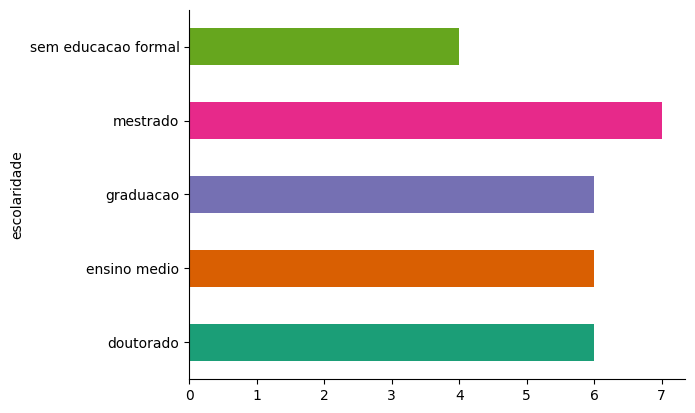

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('escolaridade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-32-bf3690700314>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_17, x='quantidade', y='escolaridade', inner='stick', palette='Dark2')


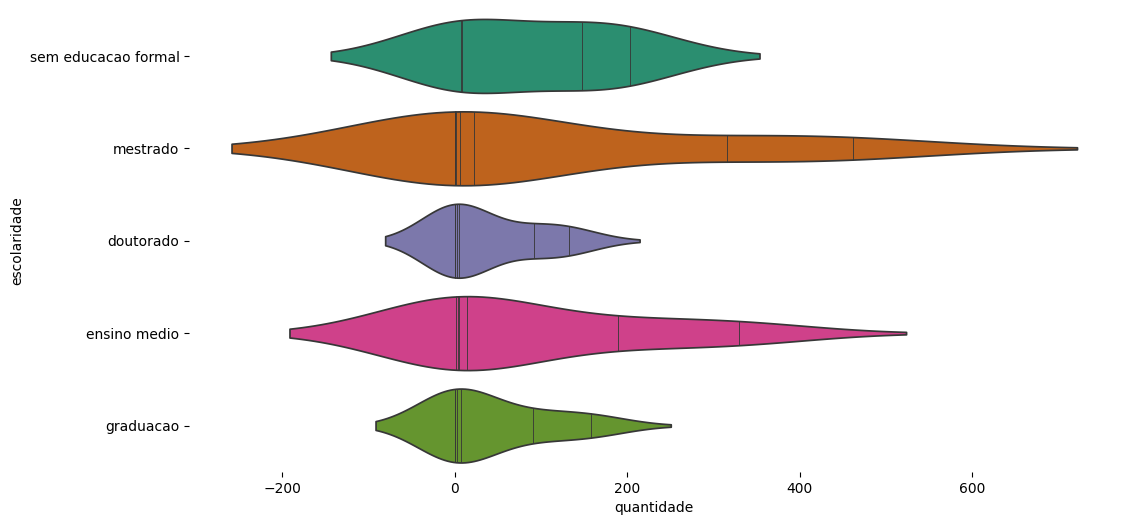

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['escolaridade'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='quantidade', y='escolaridade', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-31-22cdcf8e84c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_15, x='quantidade', y='tipo_cartao', inner='stick', palette='Dark2')


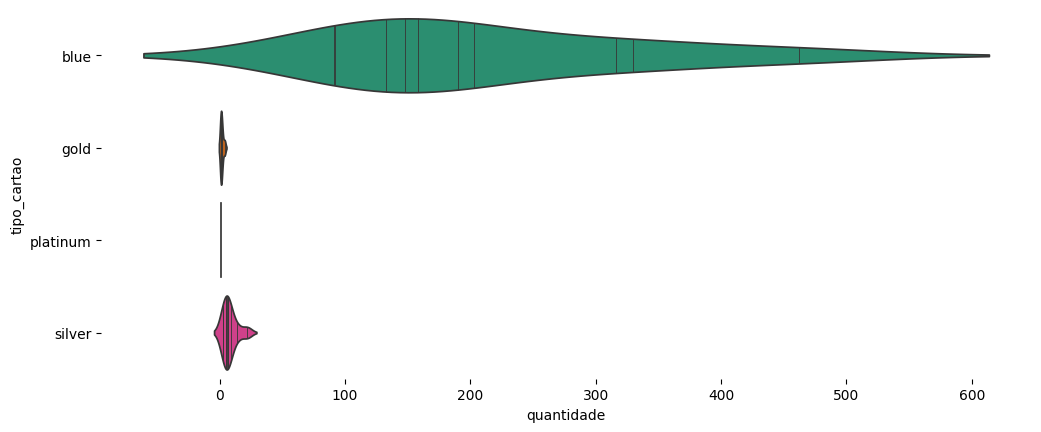

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['tipo_cartao'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='quantidade', y='tipo_cartao', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

A variável escolaridade não exibe uma relação considerável com o limite de crédito dos clientes analisados. A distribuição dos limites mínimos por tipo de cartão evidencia que a categoria blue concentra a maior proporção dos valores mais baixos, enquanto os demais tipos estão associados aos limites mais elevados. No que concerne à variável sexo, constata-se que os clientes do sexo masculino apresentam os maiores limites máximos de crédito, em contraposição aos clientes do sexo feminino, que possuem os menores limites máximos.

## 2.8 Análise da quantidade e valores das transações de acordo com o sexo e estado civil

> **Query 14:**

```sql
SELECT COUNT(*) AS quantidade,
	sexo,
	estado_civil,
	MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
	MAX(valor_transacoes_12m) AS valor_maximo_transacoes,
	AVG(valor_transacoes_12m) AS valor_medio_transacoes
FROM credito
WHERE estado_civil != 'na'
GROUP BY sexo,
	estado_civil
ORDER BY quantidade ASC;
```

In [28]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query14.csv')

,quantidade,sexo,estado_civil,valor_minimo_transacoes,valor_maximo_transacoes,valor_medio_transacoes
0,69,F,divorciado,1039.44,4370.80,2024.6688
1,92,M,divorciado,781.27,4605.89,1959.7296
2,308,F,solteiro,777.75,4776.58,2035.2687
3,458,M,solteiro,530.36,4686.93,1978.7189
4,591,F,casado,510.16,4740.94,1707.7339
5,930,M,casado,563.93,4542.69,1723.0211


A quantidade de transações apresenta uma relação notável com o estado civil, com a maioria efetuada por clientes casados e a minoria por divorciados. Em contraste, o valor médio das transações exibe uma tendência inversa, sendo mais alto entre clientes divorciados e mais baixo entre casados. Essa mesma relação se observa nos valores mínimos das transações, sugerindo uma possível ligação entre a menor frequência de transações e seus valores mais elevados.

Quanto ao sexo, a variação nas transações é menos expressiva, com uma leve diferença nos valores mínimos, que são ligeiramente maiores para clientes femininas divorciadas. Ao analisar a interação entre estado civil e sexo, clientes solteiros e divorciados do sexo masculino realizaram mais transações que as clientes femininas nas mesmas categorias, embora a quantidade seja marginalmente maior entre clientes casados.

[Voltar ao índice](#Índice)

## 2.9 Média da quantidade de transações, valor das transações e limite de crédito de acordo com o tipo de cartão e salário anual

> **Query 15:**

```sql
SELECT COUNT(*) AS quantidade,
	tipo_cartao,
	salario_anual,
	ROUND(AVG(qtd_transacoes_12m)) AS media_qtd_transacoes,
	ROUND(AVG(valor_transacoes_12m), 2) AS media_valor_transacoes,
	ROUND(AVG(limite_credito), 2) AS media_limite_credito
FROM credito
WHERE salario_anual != 'na'
GROUP BY tipo_cartao,
	salario_anual
ORDER BY CASE
		tipo_cartao
		WHEN 'blue' THEN 1
		WHEN 'silver' THEN 2
		WHEN 'gold' THEN 3 ELSE 4
	END,
	CASE
		salario_anual
		WHEN 'menos que $40K' THEN 1
		WHEN '$40K - $60K' THEN 2
		WHEN '$60K - $80K' THEN 3
		WHEN '$80K - $120K' THEN 4
		WHEN '$120K +' THEN 5 ELSE 6
	END;
```

In [29]:
pd.read_csv('https://raw.githubusercontent.com/Samuel-Oliveira-saturno/SQL_Projeto_Final-/refs/heads/main/Datasets/Query15.csv')

,quantidade,tipo_cartao,salario_anual,media_qtd_transacoes,media_valor_transacoes,media_limite_credito
0,677,blue,menos que $40K,43.0,1857.24,3797.09
1,449,blue,$40K - $60K,42.0,1841.51,4832.76
2,431,blue,$60K - $80K,41.0,1814.45,8061.38
3,461,blue,$80K - $120K,40.0,1748.57,13736.87
4,212,blue,$120K +,40.0,1707.02,17105.39
5,20,silver,menos que $40K,45.0,2120.20,12007.81
6,17,silver,$40K - $60K,43.0,1776.94,17870.18
7,15,silver,$60K - $80K,39.0,1610.78,30351.36
8,22,silver,$80K - $120K,45.0,1910.17,34516.40
9,9,silver,$120K +,41.0,1611.85,32341.10


A análise reforça a relação entre o limite de crédito e o tipo de cartão do cliente. Os clientes com cartão blue apresentam os limites de crédito médios mais baixos, com uma tendência de aumento desses limites conforme a faixa salarial anual se eleva. As médias de quantidade e valor das transações não demonstram uma correlação significativa com as variáveis analisadas neste contexto.

[Voltar ao índice](#Índice)

# **3. Conclusão:**

##Principais Insights da Análise de Clientes:##

* Perfil Predominante: A maioria dos clientes possui salário anual inferior a $40.000,00, utiliza o cartão blue e apresenta limites de crédito mais baixos. Este segmento representa um foco potencial para campanhas de marketing de grande alcance.
* Limite de Crédito por Sexo: Clientes masculinos demonstram limites máximos de crédito superiores aos femininos. No entanto, a distribuição desigual entre os sexos na base de dados pode influenciar essa observação.
* Transações por Estado Civil: Clientes casados realizam a maior parte das * transações, enquanto divorciados efetuam a menor quantidade, porém com um valor médio por transação mais elevado. Isso sugere que o menor volume de transações entre divorciados pode estar ligado a valores unitários maiores.
* Transações por Gênero e Estado Civil: Homens solteiros e divorciados realizam mais transações que mulheres nas mesmas categorias. Clientes casados, no geral, apresentam o maior volume de transações.
* Limite de Crédito e Tipo de Cartão/Salário: O cartão blue está associado aos limites de crédito médios mais baixos. Dentro de cada tipo de cartão, o limite de crédito médio aumenta conforme a faixa salarial anual do cliente.
* Implicações para Marketing: Os insights fornecem uma base para segmentação e personalização de estratégias de marketing, otimizando a comunicação com diferentes perfis de clientes.

##Recomendação para Campanha de Marketing:##

Para uma campanha focada nos clientes mais ativos, recomenda-se direcionar os esforços principalmente para o segmento de clientes casados com cartão blue e salário anual abaixo de $40.000,00. Essa estratégia visa otimizar o engajamento e a resposta, concentrando recursos no grupo com maior representatividade e potencial.

[Voltar ao índice](#Índice)

---